# Importing libraries

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Reading csv file 

In [96]:
df=pd.read_csv("C:\\Users\\admin\\Desktop\\CODESOFT-Data Science\\Task 1\\Titanic-Dataset.csv")

In [98]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
df.drop(['Cabin'], axis=1, inplace=True)

In [106]:
df.dropna(inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [110]:
df.duplicated().sum()

0

# Survived Col

In [113]:
survived_counts=df['Survived'].value_counts()

In [115]:
survived_counts

Survived
0    424
1    288
Name: count, dtype: int64

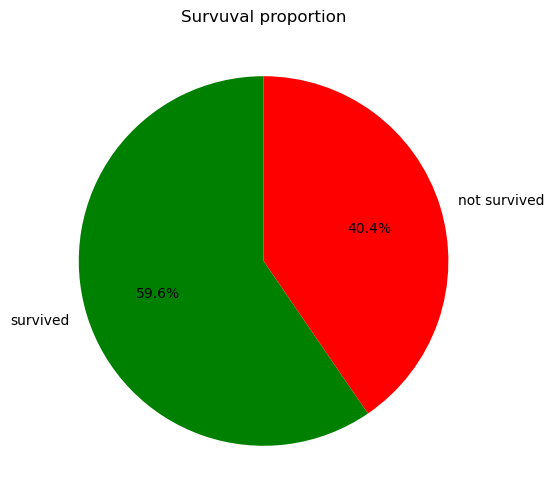

In [117]:
plt.figure(figsize=(8,6))
plt.pie(survived_counts, labels=['survived','not survived'], autopct='%1.1F%%', colors=['green','red'],startangle=90)
plt.title('Survuval proportion')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\2586104459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')


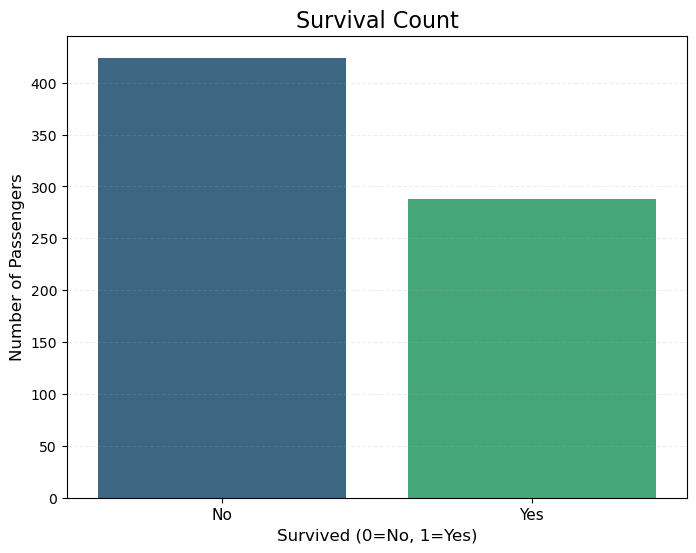

In [118]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')
plt.title('Survival Count', fontsize=16)
plt.xlabel('Survived (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


# Pclass Col 

In [122]:
df['Pclass'].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

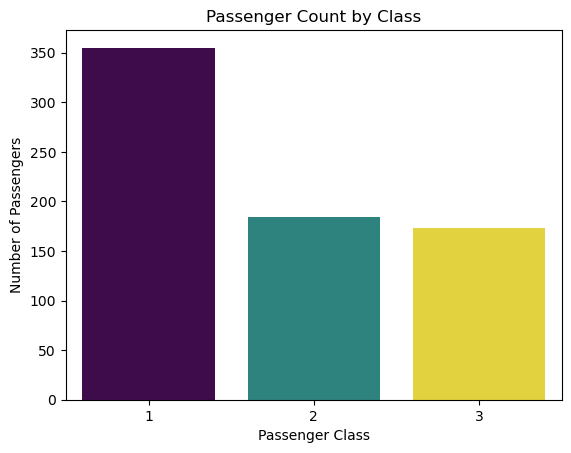

In [123]:
sns.barplot(x=[1, 2, 3], y=df['Pclass'].value_counts(), hue=[1, 2, 3], palette='viridis', legend=False)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Class')
plt.show()


# Sex Col

In [127]:
df.Sex.value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\241308235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Male','Female'], y=df.Sex.value_counts(),palette='viridis', legend=False)


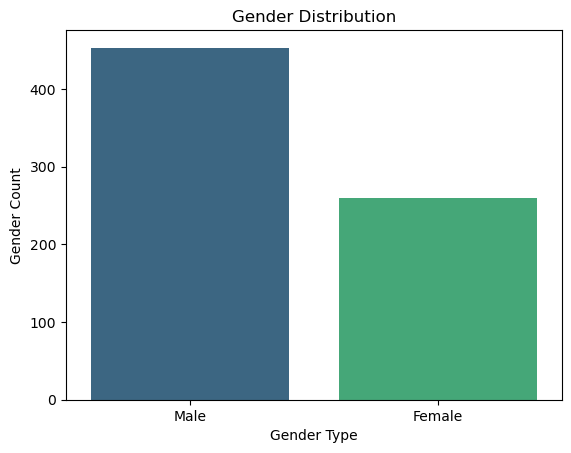

In [129]:
sns.barplot(x=['Male','Female'], y=df.Sex.value_counts(),palette='viridis', legend=False)
plt.title("Gender Distribution")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()

# Age Column

In [131]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [132]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\963026129.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df.Age, bins=20, palette='viridis')


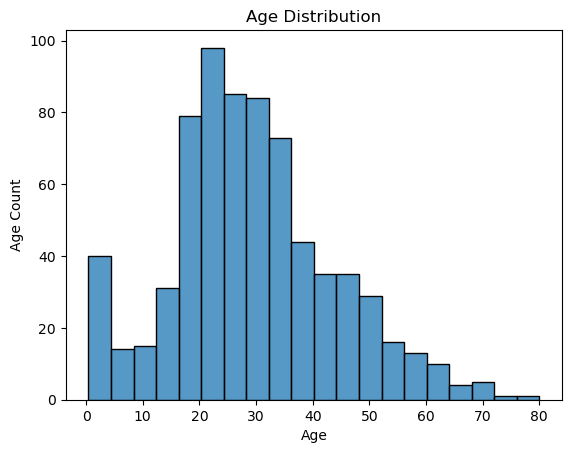

In [133]:
sns.histplot(x=df.Age, bins=20, palette='viridis')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.show()

# SibSp Column 

In [137]:
df.SibSp.value_counts()

SibSp
0    469
1    183
2     25
4     18
3     12
5      5
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\515197879.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['0','1','2','3','4','5'], y=df.SibSp.value_counts(), palette='viridis')


<Axes: ylabel='count'>

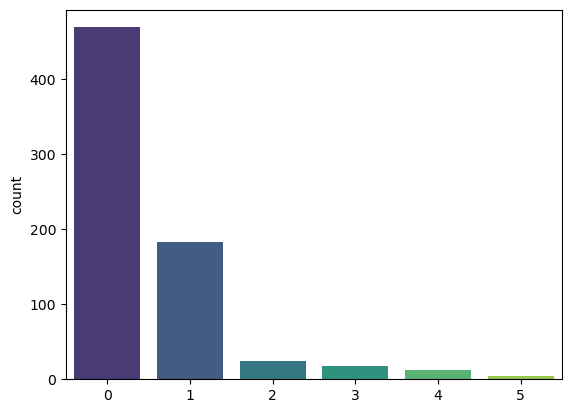

In [138]:
sns.barplot(x=['0','1','2','3','4','5'], y=df.SibSp.value_counts(), palette='viridis')

# Parch Column 

In [141]:
df.Parch.value_counts()

Parch
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\217460227.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['0','1','2','3','4','5','6'], y=df.Parch.value_counts(), palette='viridis')


<Axes: ylabel='count'>

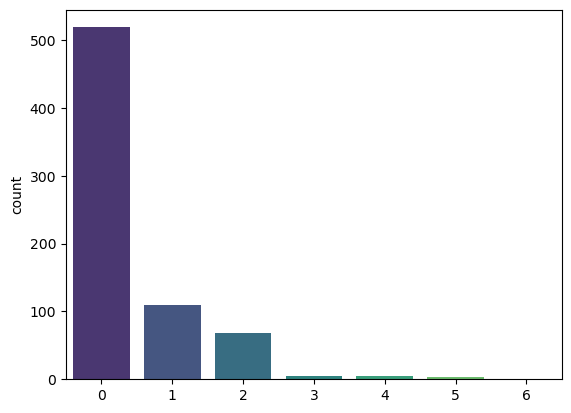

In [142]:
sns.barplot(x=['0','1','2','3','4','5','6'], y=df.Parch.value_counts(), palette='viridis')

In [145]:
df.Fare.value_counts()

Fare
13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
6.2375      1
14.0000     1
9.4750      1
8.8500      1
10.5167     1
Name: count, Length: 219, dtype: int64

In [146]:
df.Fare.describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'shpw'

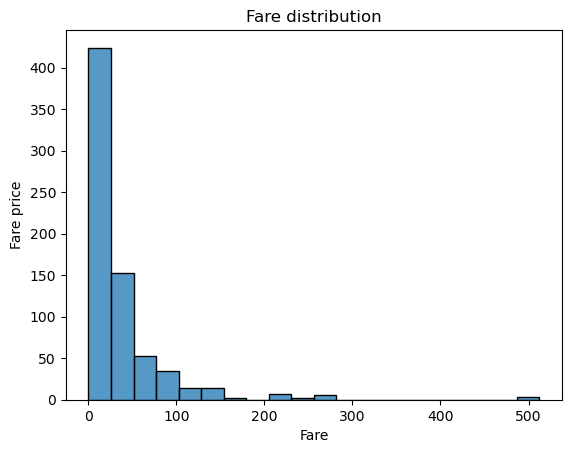

In [147]:
sns.histplot(df.Fare, bins=20)
plt.title("Fare distribution")
plt.xlabel('Fare')
plt.ylabel('Fare price')
plt.shpw()

In [187]:
Q1=df.Fare.quantile(0.25)
Q3=df.Fare.quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
lower=Q1 - 1.5*IQR

print(upper)
print(lower)

70.425
-29.374999999999996


 - alot of upper outliers and we are going to point them out

In [190]:
df.Fare>70

0      False
1       True
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: Fare, Length: 712, dtype: bool

In [192]:
df[df.Fare>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S


In [194]:
df[df.Fare>70].max()

PassengerId                         880
Survived                              1
Pclass                                2
Name           Young, Miss. Marie Grice
Sex                                male
Age                                70.0
SibSp                                 3
Parch                                 4
Ticket                        WE/P 5735
Fare                           512.3292
Embarked                              S
dtype: object

# Embarked Column 

In [197]:
df.Embarked.value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\2130351369.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['S','C','Q'], y=df.Embarked.value_counts(), palette='viridis')


<Axes: ylabel='count'>

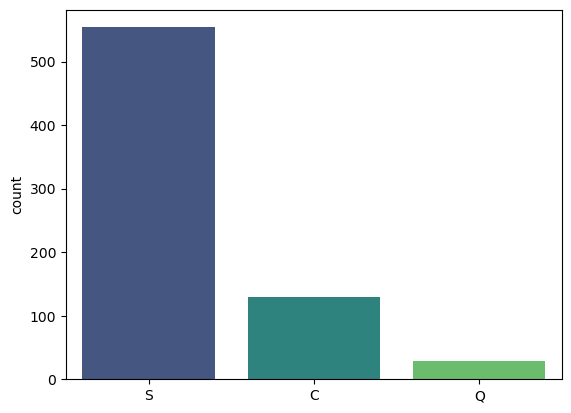

In [199]:
sns.barplot(x=['S','C','Q'], y=df.Embarked.value_counts(), palette='viridis')

# Multi Variate Analysis

In [202]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           195
        0            64
male    0           360
        1            93
Name: count, dtype: int64

- A higher percentage of females survived compared to males.
- Males had a much lower survival rate, as more males did not survive (360) compared to those who did (93).

In [205]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           120
        0            64
2       0            90
        1            83
3       0           270
        1            85
Name: count, dtype: int64

- The majority of people who died were from Class 3, as it was located closest to the ocean.
- Passengers from Class 1 had the highest survival rate because they were situated further from the water and were prioritized for lifeboats.
- Class 2 passengers had roughly equal chances of survival, with their outcomes being nearly split between survival and loss.

In [208]:
df.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            80
                0             3
        male    0            61
                1            40
2       female  1            68
                0             6
        male    0            84
                1            15
3       female  0            55
                1            47
        male    0           215
                1            38
Name: count, dtype: int64

- Least men died where from Class 1 and only 3 women died from class 1
- Most men and women died where from Class 3
- The only Class that more Females Died than Survived where in Class 1
- The least percantage of men that died where on Class 1

In [211]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [213]:
df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\2852615816.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()


AgeGroup  Survived
0-18      0            52
19-35     0           231
36-50     0            94
51-65     0            37
66+       0            10
Name: count, dtype: int64

In [215]:
df.groupby(['AgeGroup','Sex'])['Survived'].value_counts()

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\4238015194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup','Sex'])['Survived'].value_counts()


AgeGroup  Sex     Survived
0-18      female  1            38
                  0            17
          male    0            35
                  1            23
19-35     female  1            94
                  0            31
          male    0           200
                  1            41
36-50     female  1            44
                  0            14
          male    0            80
                  1            22
51-65     female  1            19
                  0             2
          male    0            35
                  1             6
66+       female  0             0
                  1             0
          male    0            10
                  1             1
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\2265903424.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['AgeGroup', 'Sex', 'Survived']).size().reset_index(name='Count')


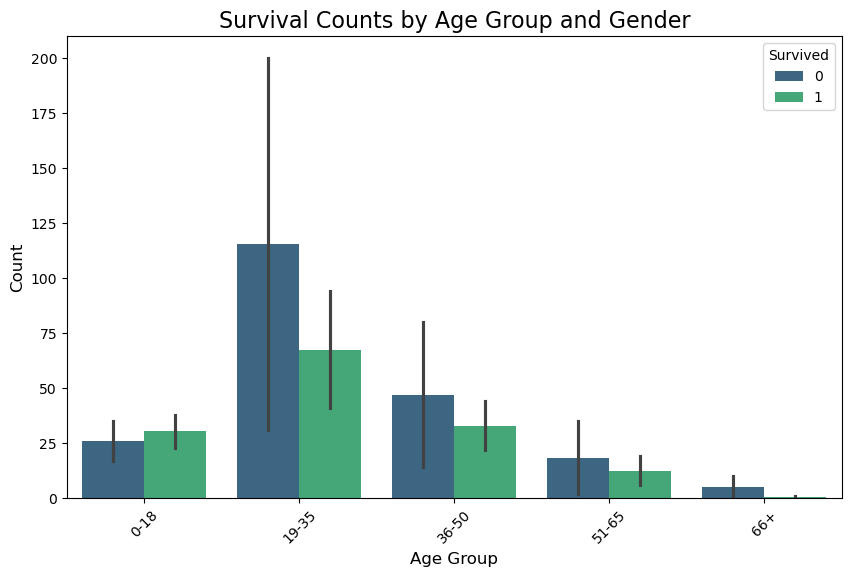

In [217]:
grouped_data = df.groupby(['AgeGroup', 'Sex', 'Survived']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', hue='Survived', data=grouped_data, palette='viridis')
plt.title('Survival Counts by Age Group and Gender', fontsize=16) 
plt.xlabel('Age Group', fontsize=12) 
plt.ylabel('Count', fontsize=12) 
plt.xticks(rotation=45) 
plt.legend(title='Survived', loc='upper right')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\2581172379.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['AgeGroup', 'Sex']).size().reset_index(name='Count')


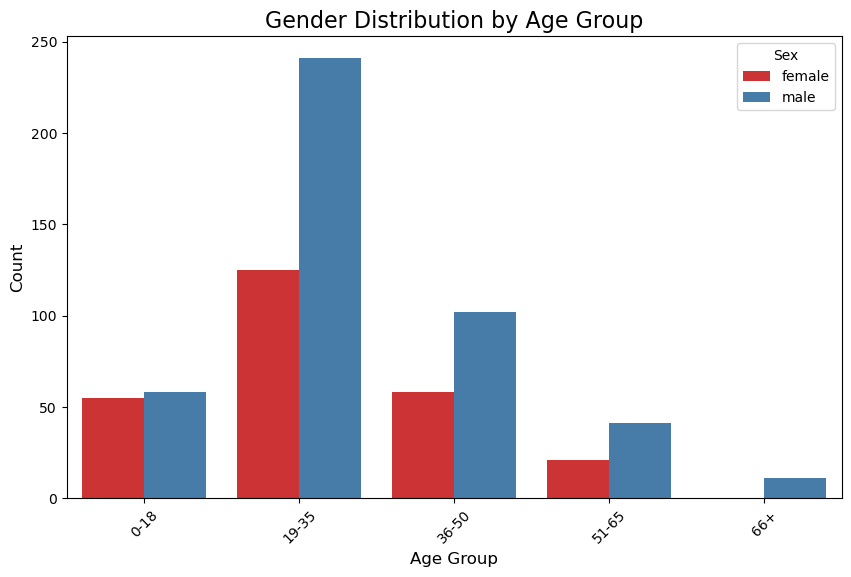

In [219]:
grouped_data = df.groupby(['AgeGroup', 'Sex']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', hue='Sex', data=grouped_data, palette='Set1')
plt.title('Gender Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.legend(title='Sex', loc='upper right')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14088\1041742366.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_survived = df.groupby(['AgeGroup', 'Sex', 'Survived']).size().reset_index(name='Count')
C:\Users\admin\AppData\Local\Temp\ipykernel_14088\1041742366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_gender = df.groupby(['AgeGroup', 'Sex']).size().reset_index(name='Count')


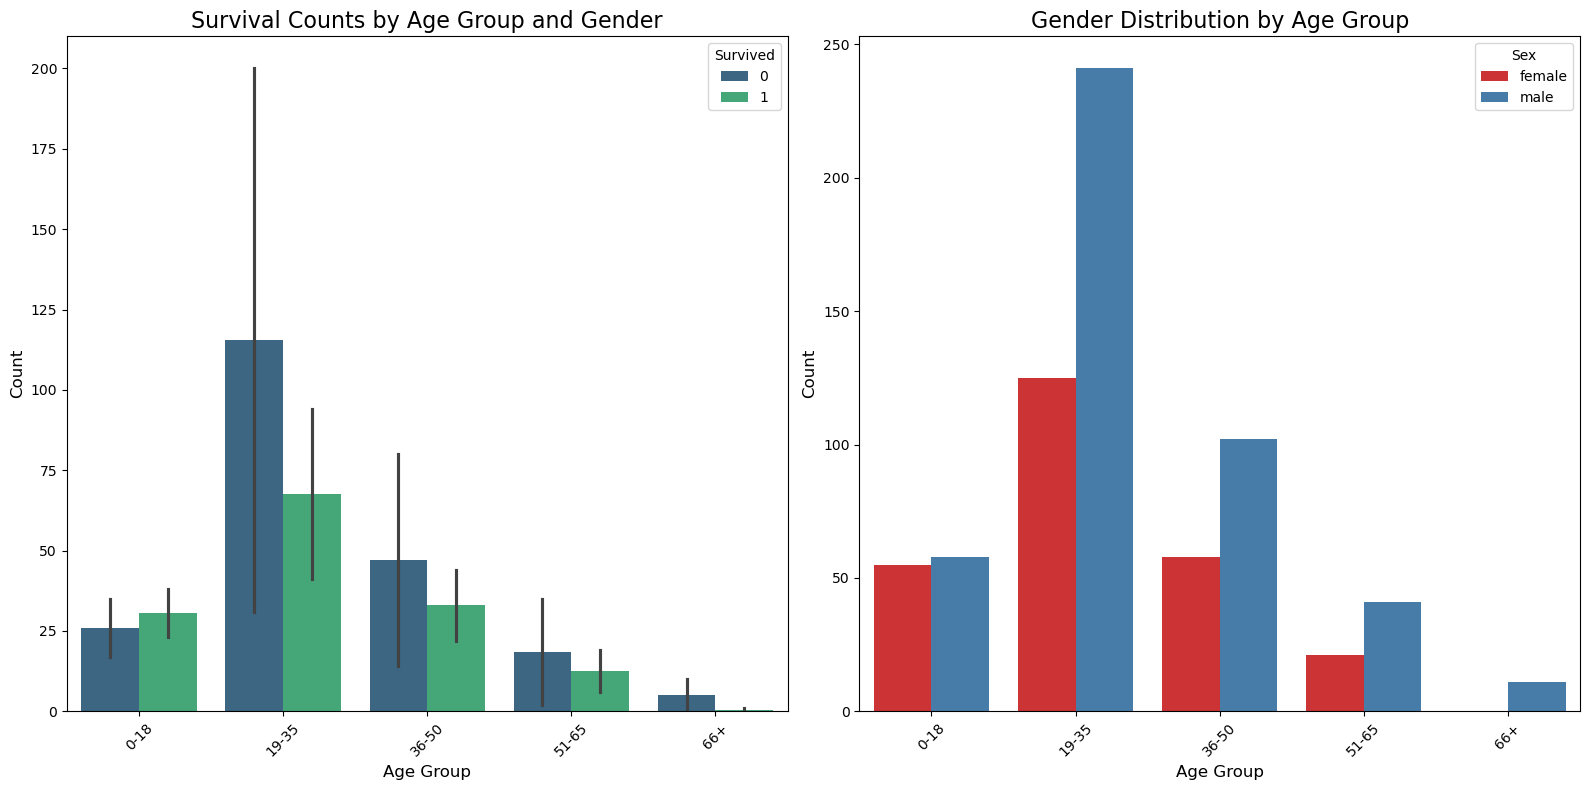

In [221]:
grouped_data_survived = df.groupby(['AgeGroup', 'Sex', 'Survived']).size().reset_index(name='Count')
grouped_data_gender = df.groupby(['AgeGroup', 'Sex']).size().reset_index(name='Count')
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 
sns.barplot(ax=axes[0], x='AgeGroup', y='Count', hue='Survived', data=grouped_data_survived, palette='viridis')
axes[0].set_title('Survival Counts by Age Group and Gender', fontsize=16)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  
axes[0].legend(title='Survived', loc='upper right')

sns.barplot(ax=axes[1], x='AgeGroup', y='Count', hue='Sex', data=grouped_data_gender, palette='Set1')
axes[1].set_title('Gender Distribution by Age Group', fontsize=16)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45) 
axes[1].legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

In [223]:
df.groupby(['SibSp'])['Survived'].value_counts()

SibSp  Survived
0      0           296
       1           173
1      1            97
       0            86
2      0            14
       1            11
3      0             8
       1             4
4      0            15
       1             3
5      0             5
Name: count, dtype: int64

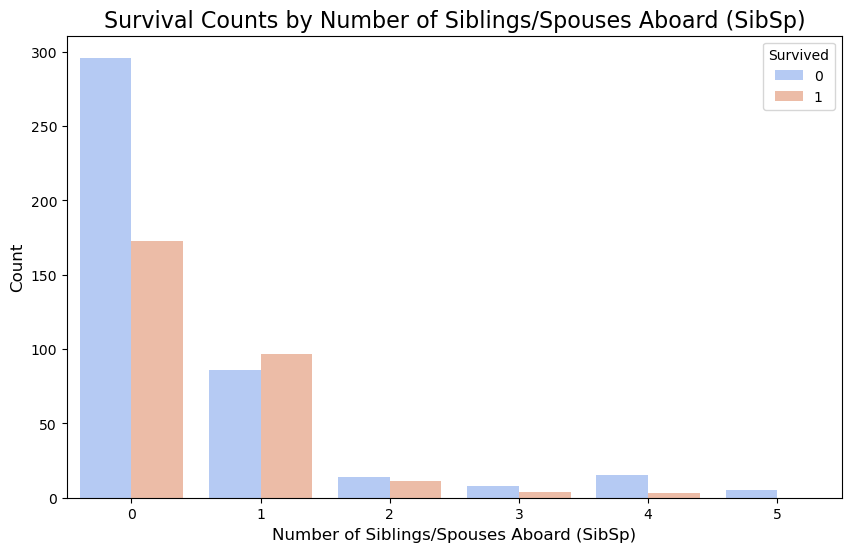

In [225]:
grouped_data = df.groupby(['SibSp', 'Survived']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='SibSp', y='Count', hue='Survived', data=grouped_data, palette='coolwarm')
plt.title('Survival Counts by Number of Siblings/Spouses Aboard (SibSp)', fontsize=16)
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [227]:
df.groupby(['Parch'])['Survived'].value_counts()

Parch  Survived
0      0           335
       1           184
1      1            61
       0            49
2      1            39
       0            29
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

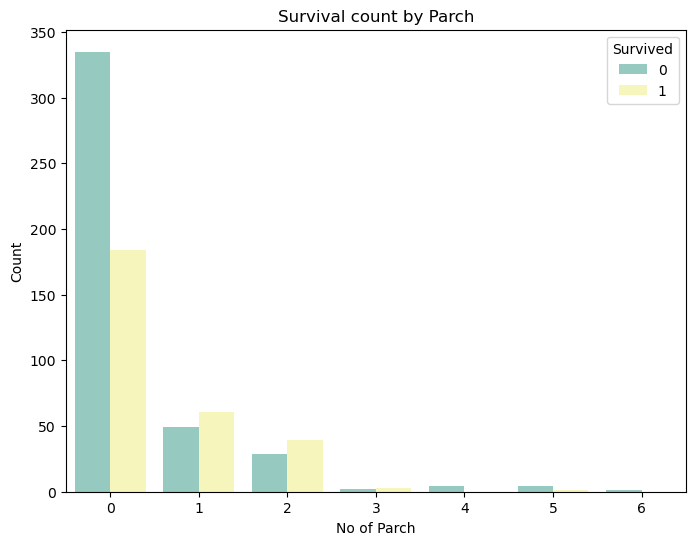

In [229]:
grouped_data=df.groupby(['Parch','Survived']).size().reset_index(name='count')
plt.figure(figsize=(8,6))
sns.barplot(x='Parch', y='count', hue='Survived', data=grouped_data, palette='Set3')
plt.title("Survival count by Parch")
plt.xlabel('No of Parch')
plt.ylabel('Count')
plt.show()

# Machine Learning 

### 1. Logistic Regression

- Preprocessing

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    int64   
 1   Survived     712 non-null    int64   
 2   Pclass       712 non-null    int64   
 3   Name         712 non-null    object  
 4   Sex          712 non-null    object  
 5   Age          712 non-null    float64 
 6   SibSp        712 non-null    int64   
 7   Parch        712 non-null    int64   
 8   Ticket       712 non-null    object  
 9   Fare         712 non-null    float64 
 10  Embarked     712 non-null    object  
 11  AgeGroup     712 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 67.7+ KB


In [236]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [238]:
df.drop(['PassengerId','Ticket','Name','AgeGroup'],axis=1,inplace=True)

In [240]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [242]:
encoder= LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Survived']=encoder.fit_transform(df['Survived'])

In [244]:
X=df.drop(columns=["Survived"])
y=df.Survived

In [246]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [248]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=7)


In [252]:
model=LogisticRegression(max_iter=12000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [254]:
y_pred=model.predict(X_test)

In [256]:
model.score(X_train,y_train)*100

81.01933216168717

In [258]:
model.score(X_test,y_test)*100

79.72027972027972

In [260]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

79%


In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        88
           1       0.80      0.64      0.71        55

    accuracy                           0.80       143
   macro avg       0.80      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143



In [264]:
print(confusion_matrix(y_test,y_pred))

[[79  9]
 [20 35]]


In [266]:
modelsv=SVC()
modelsv.fit(X_train,y_train)

SVC()

In [268]:
y_pred=modelsv.predict(X_test)

In [270]:
modelsv.score(X_train,y_train)*100

66.95957820738137

In [272]:
modelsv.score(X_test,y_test)*100

69.93006993006993

In [274]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

69%


# KNN classifier

In [277]:
ModelK=KNeighborsClassifier(n_neighbors=12)
ModelK.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [279]:
y_pred=ModelK.predict(X_test)

In [282]:
ModelK.score(X_train,y_train)*100

73.81370826010544

In [284]:
ModelK.score(X_test,y_test)*100

70.62937062937063

In [286]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

70%


In [288]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        88
           1       0.64      0.53      0.58        55

    accuracy                           0.71       143
   macro avg       0.69      0.67      0.68       143
weighted avg       0.70      0.71      0.70       143



In [290]:
print(confusion_matrix(y_test,y_pred))

[[72 16]
 [26 29]]


# Decision Tree Classifier

In [293]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [295]:
y_pred=classifier.predict(X_test)

In [297]:
print(classifier.score(X_train,y_train)*100)

98.76977152899823


In [299]:
print(classifier.score(X_test,y_test)*100)

72.72727272727273


In [301]:
print(accuracy_score(y_test,y_pred)*100)

72.72727272727273
